In [9]:
import pandas as pd
from policylearning import *
import matplotlib.pyplot as plt

In [ ]:
def plot_grouped_ate(df, cols, treat_var, outcome_var):
    ate = df[df[treat_var] == 1][outcome_var].mean() - df[df[treat_var] == 0][outcome_var].mean()
    cates = []

    for subset in range(1,len(cols)+1):
        bin_df = build_binary_feature_matrix(df, cols[:subset])[0]
        bin_df = bin_df.drop(columns=cols)
        bin_cols = ["bin__" + c for c in cols[:subset]]
        cate_df = compute_cate(bin_df, bin_cols, 're78', "treated")
        cate_df['n'] = cate_df['n_treat'] + cate_df['n_control']
        cates.append((cate_df['n'] * cate_df['ate']).sum() / cate_df['n'].sum())

    plt.plot(cates)
    plt.axhline(y=ate)
    plt.xticks(ticks=range(len(cols)), labels=["+"+c for c in cols], rotation=90)

# NSW

In [2]:
df = pd.read_csv("nsw/ec675_nsw.tab", sep="\t")
exp_df = df[df['sample'] == 1]
ate = exp_df[exp_df['treated'] == 1]['re78'].mean() - exp_df[exp_df['treated'] == 0]['re78'].mean()

In [3]:
df.columns

Index(['treated', 'age', 'educ', 'black', 'married', 'nodegree', 'dwincl',
       're74', 're75', 're78', 'hisp', 'early_ra', 'sample'],
      dtype='object')

([<matplotlib.axis.XTick at 0x7fd745dd4350>,
 [Text(0, 0, '+age'),
  Text(1, 0, '+educ'),
  Text(2, 0, '+black'),
  Text(3, 0, '+married'),
  Text(4, 0, '+hisp'),
  Text(5, 0, '+re74'),
  Text(6, 0, '+re75')])

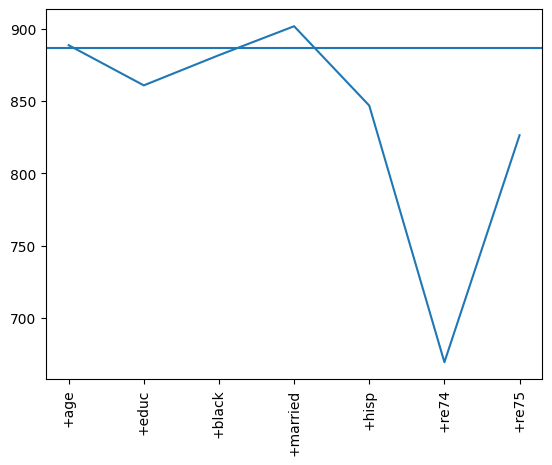

In [ ]:
# cols = ['age', 'educ', 'black', 'married', 'nodegree','hisp',  're74', 're75']
cols = ['age', 'educ', 'black', 'married','hisp',  're74', 're75']
cates = []

for subset in range(1,len(cols)+1):
    bin_df = build_binary_feature_matrix(exp_df, cols[:subset])[0]
    bin_df = bin_df.drop(columns=cols)
    bin_cols = ["bin__" + c for c in cols[:subset]]
    cate_df = compute_cate(bin_df, bin_cols, 're78', "treated")
    cate_df['n'] = cate_df['n_treat'] + cate_df['n_control']
    cates.append((cate_df['n'] * cate_df['ate']).sum() / cate_df['n'].sum())

plt.plot(cates)
plt.axhline(y=ate)
plt.xticks(ticks=range(len(cols)), labels=["+"+c for c in cols], rotation=90)

In [ ]:
["voted06", "voted08", "voted09", "voted10", "voted11", "voted12", "voted13", "i_age",
        "age_miss", "age2", "flag_hhid_mult_hhid", "flag_hhid_mult_z", "flag_drop_hhid",
        "vote_hist", "state_median", "vh_stratum", "vhblw", "vhavg", "vhabv", "d_married",
        "d_unmarried", "d_hhsize1", "d_hhsize2", "d_hhsize3", "d_hhsize4"]

480.94538059326993